# MRSequoia example for JupyterLab
![](MRSequoiaLogo_200px.png)

#### Written by Sebastian Hirsch (sebastian.hirsch@bccn-berlin.de)

This notebook gives a general overview over MRSequoia's functionality.

Instantiate an SequenceTiming object from simulation output of the standard FLASH sequence:

In [1]:
from SequenceTiming import SequenceTiming
file = 'SiemensTools/examples/FLASH/SimulationProtocol_INF.dsv'
st = SequenceTiming(file)

Disclaimer: While a lot of effort has gone into development of this software, it still has to be considered unvalidated. By using this software you agree to not hold its developer(s) responsible for any harm or damage that might result from deploying a custom sequence. Ensuring the safety of a sequence is the sole responsibility of the sequence developer(s).


## Visualization

Plot the waveform of the first gradient in the readout (gro) direction, in physical (x, y, z) coordinates:

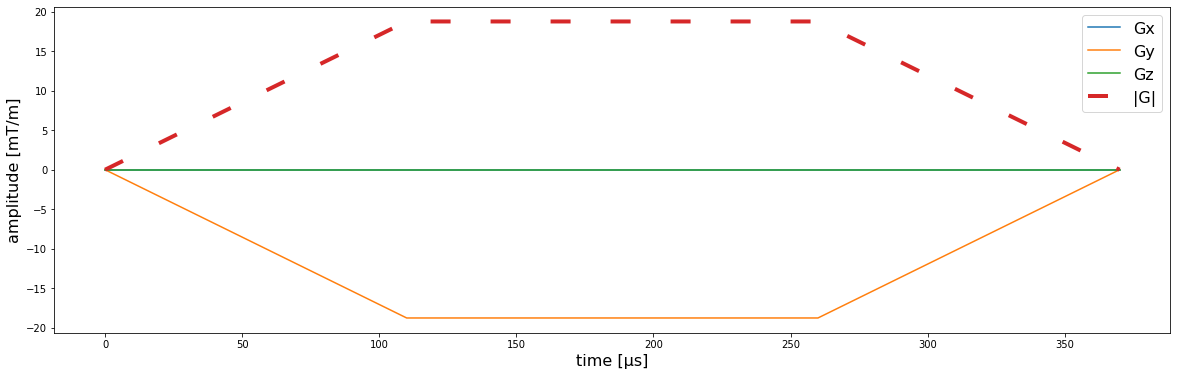

In [2]:
st.gro[0].plot_trapezoidal()

The same in logical (SS, PE, RO) coordinates:

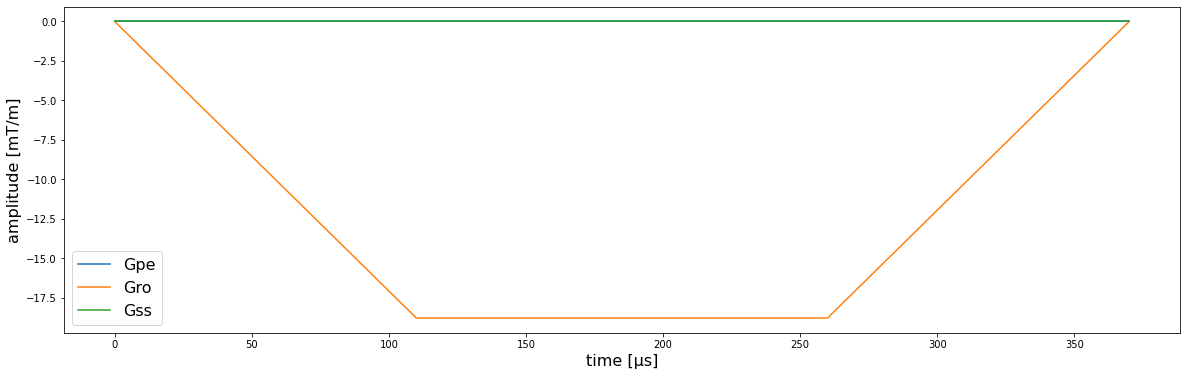

In [3]:
st.gro[0].plot_trapezoidal(scanner_coordinates=False)

Plot the waveform of the first RF pulse:

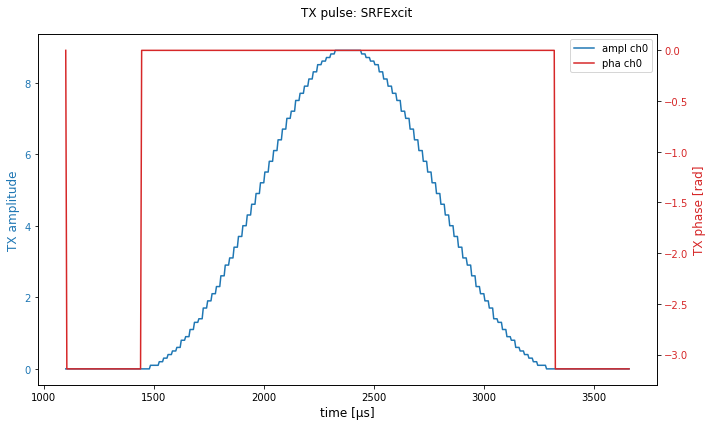

In [4]:
st.tx[0].plot_waveform()

Plot a spectrum of the acoustic gradient frequencies, up to 2 kHz:

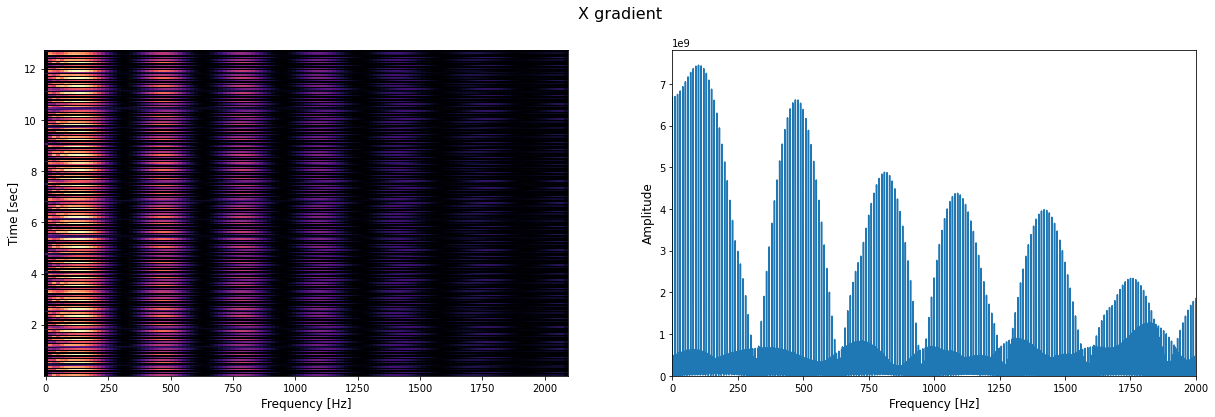

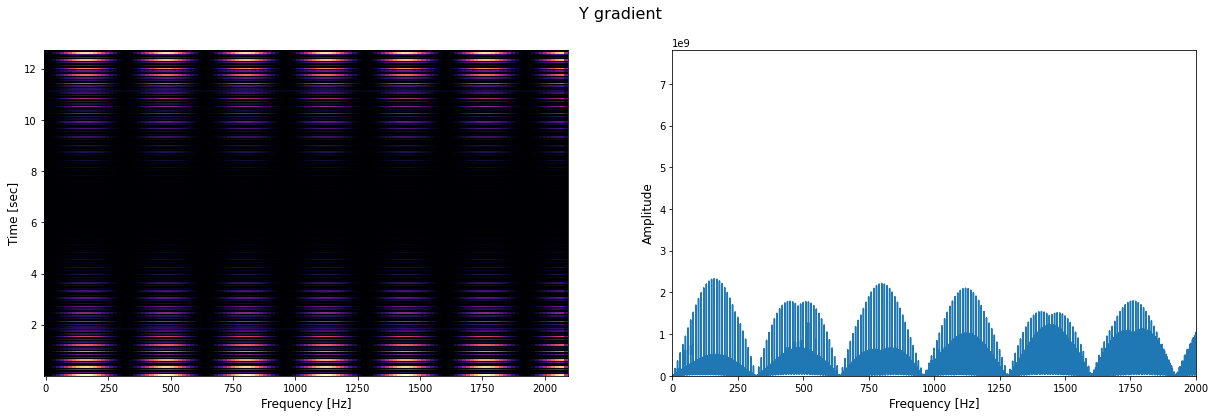

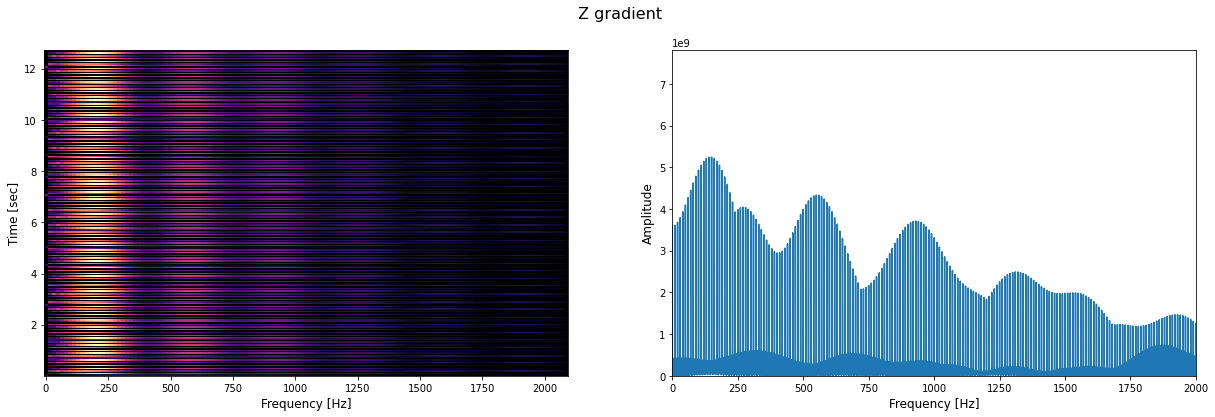

In [5]:
from Spectrogram import Spectrogram
s = Spectrogram(st)
s.plot_spectra(fmax=2000)

## Timing checks:

**_One of the main purposes of MRSequoia is to enable us to run arbitrary timing checks simulator output._**

With **TRCheck** we can check that TR is constant by measuring the distance between successive RF pulses:

In [6]:
from TRCheck import TRCheck
tr_check = TRCheck(st.tx[0].name)  # the argument is used as a selector, i.e., all RealtimeEvents with a name identical to the name of the first TX pulse are selected
tr_check.run_check(st)

Found 128 events
Found one value for TR: 100000 µs
TRCheck: Success!


True

The same, but using a lambda expression as a selector. Chooses all RealtimeEvents that are of type TXEvents and have a flip angle of 15°. The isinstance() condition is necessary, since not all classes derived from RealtimeEvent have an angle property. Therefore, not checking for the type first would cause an error.

In [7]:
from Atoms.GradientAtom import GradientAtom
from Atoms.TXAtom import TXAtom

selector = lambda x: isinstance(x, TXAtom) and x.angle==15
tr_check = TRCheck(selector)
tr_check.run_check(st)

Found 128 events
Found one value for TR: 100000 µs
TRCheck: Success!


True

We can also specify the expected value of TR. The following check will fail, because the actual TR was 10,000 µs.

In [8]:
tr_check.run_check(st, 90000)

Found 128 events
Found one value for TR: 100000 µs
Expected TR: 90000
TRCheck: Epic fail!


False

**VariableDelayCheck** allows us to verify that the interval between two different RealtimeEvents only has values from a specified set of allowed values. In this example, we check that the delay between an excitation pulse and a phase-encode rewinder gradient is 90,000 µs, 100,000 µs, or 32560 µs.

In [9]:
from VariableDelayCheck import VariableDelayCheck
vd_check=VariableDelayCheck('SRFExcit', 'PERew')
allowed_values = [90000, 100000, 32560]
vd_check.run_check(st, allowed_values)

Found 128 events
Found 128 events
VariableDelayCheck: Success!


True

The same check will fail if we change the set of allowed values

In [10]:
allowed_values = [13000]
vd_check.run_check(st, allowed_values)

Found 128 events
Found 128 events
Value 32560 is not in the set of allowed values.
VariableDelayCheck: Epic fail!


False

See, I'm not lying to you. ;)

For each ADC event, the corresponding MDH (measurement data header) is available:

In [11]:
st.adc[0].adc_info.print()

ADC start time: 31100 µs, ADC duration: 2560 µs
aulEvalInfoMask0           : 0                             
aulEvalInfoMask1           : 0                             
aushIceProgramPara0        : 0                             
aushIceProgramPara1        : 0                             
aushIceProgramPara10       : 0                             
aushIceProgramPara11       : 0                             
aushIceProgramPara12       : 0                             
aushIceProgramPara13       : 0                             
aushIceProgramPara14       : 0                             
aushIceProgramPara15       : 0                             
aushIceProgramPara16       : 0                             
aushIceProgramPara17       : 0                             
aushIceProgramPara18       : 0                             
aushIceProgramPara19       : 0                             
aushIceProgramPara2        : 0                             
aushIceProgramPara20       : 0                      

And that concludes our little introduction to MRSequoia. Have fun exploring!